Before you begin, execute this cell to import numpy and packages from the D-Wave Ocean suite, and all necessary functions the gate-model framework you are going to use, whether that is the Forest SDK or Qiskit. In the case of Forest SDK, it also starts the qvm and quilc servers.

In [1]:
%run -i "assignment_helper.py"

Available frameworks:
Forest SDK
Qiskit
D-Wave Ocean


# Defining circuits

**Exercise 1** (2 points). Quantum computers typically initialize their qubit registers in the $|0\rangle$ state. This means that if there is any particular state we would like to work with, first we have to figure out how to create that state with a circuit. Some states are easier to prepare than others. If you are just given a random vector, say, $\begin{bmatrix}0.36\\  0.8704\end{bmatrix}$, it is not easy to figure out how to prepare it. In fact, the very purpose of quantum computing is to prepare a probability distribution of interest, that is, a state. So in some ways, generic state preparation is as hard as or equivalent to quantum computation. On the other hand, some states are easy to prepare; for instance, the state $\frac{-|0\rangle + |1\rangle}{\sqrt{2}}$. Create a circuit in your preferred framework that prepares this state. The object should be called `circuit`.

In [2]:
import numpy as np
import pyquil
import qiskit
from pyquil import Program, get_qc
from pyquil.api import WavefunctionSimulator
from pyquil.gates import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer

#
backend_statevector = BasicAer.get_backend('statevector_simulator')
backend = BasicAer.get_backend('qasm_simulator')

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.z(q[0])
circuit.x(q[0])

job = execute(circuit, backend_statevector)
print(job.result().get_statevector(circuit))


#


[-0.70710678+0.j  0.70710678+0.j]


In [3]:
amplitudes = get_amplitudes(circuit)
assert all(np.isclose(amplitudes, np.array([-1/np.sqrt(2), 1/np.sqrt(2)])))

**Exercise 2** (2 points). We know that entanglement is an important resource for quantum computing, but so far we entangled only a pair of qubits. Create a circuit to prepare the state $\frac{|000\rangle + |111\rangle}{\sqrt{2}}$, which is a three-qubit entangled state. The circuit should be in an object called `circuit` with three quantum and three classical registers. If you use PyQuil, declare the classical registers in a variable called `ro`. The circuit is the following:

<img src="figures/three_qubit_entanglement.png" alt="Creating three-qubit entanglement" style="width: 100px;"/>

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


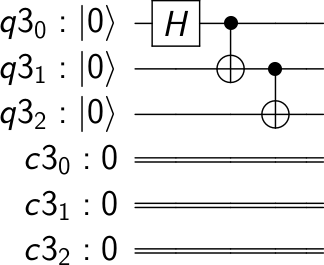

In [7]:
#
from qiskit.tools.visualization import circuit_drawer
backend_statevector = BasicAer.get_backend('statevector_simulator')
backend = BasicAer.get_backend('qasm_simulator')

q = QuantumRegister(3)
c = ClassicalRegister(3)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.cx(q[1], q[2])

job = execute(circuit, backend_statevector)
print(job.result().get_statevector(circuit))
circuit_drawer(circuit)
#


In [8]:
amplitudes = get_amplitudes(circuit)
assert all(np.isclose(amplitudes, np.array([1/np.sqrt(2), 0, 0, 0, 0, 0, 0, 1/np.sqrt(2)])))

**Exercise 3** (1 point). This state is entangled and exhibits very strong correlations between the qubits. To see this, add a measurement on each qubit. We'll run the circuit a hundred times and study the statistics.

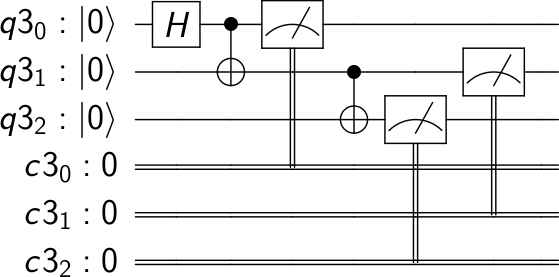

In [9]:
#
circuit.measure(q, c)
circuit_drawer(circuit)
#


In [10]:
counts = get_counts(circuit)
assert abs(counts['000']/100-.5) < 0.1
assert abs(counts['111']/100-.5) < 0.1
assert  counts['000'] + counts['111'] == 100

The measurement statistics show that if any of the qubits measured gives 0, so do the other two. If a qubit is measured 1, then the other two will be 1 as well.